<a href="https://colab.research.google.com/github/jyothsna1076/AnamolyDetectionPRMLProject/blob/main/prml_mid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from scipy.stats import mode

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Train_data.csv")

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Test_data.csv")

# Data Preprocessing

In [ ]:
train_data.head()
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
train_data.shape

(25192, 42)

In [ ]:
train_data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
total = train_data.shape[0]
missing_columns = [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train_data[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [ ]:
print(f"Number of duplicate rows: {train_data.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='class', ylabel='count'>

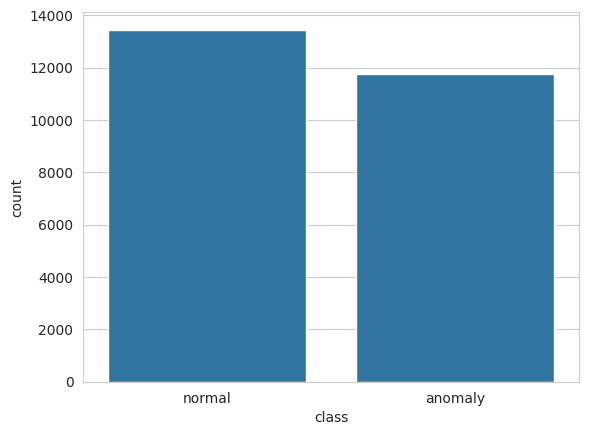

In [ ]:
sns.countplot(x=train_data['class'])

In [ ]:
print('Class distribution Training set:')
print(train_data['class'].value_counts())

Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [ ]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train_data)
le(test_data)


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

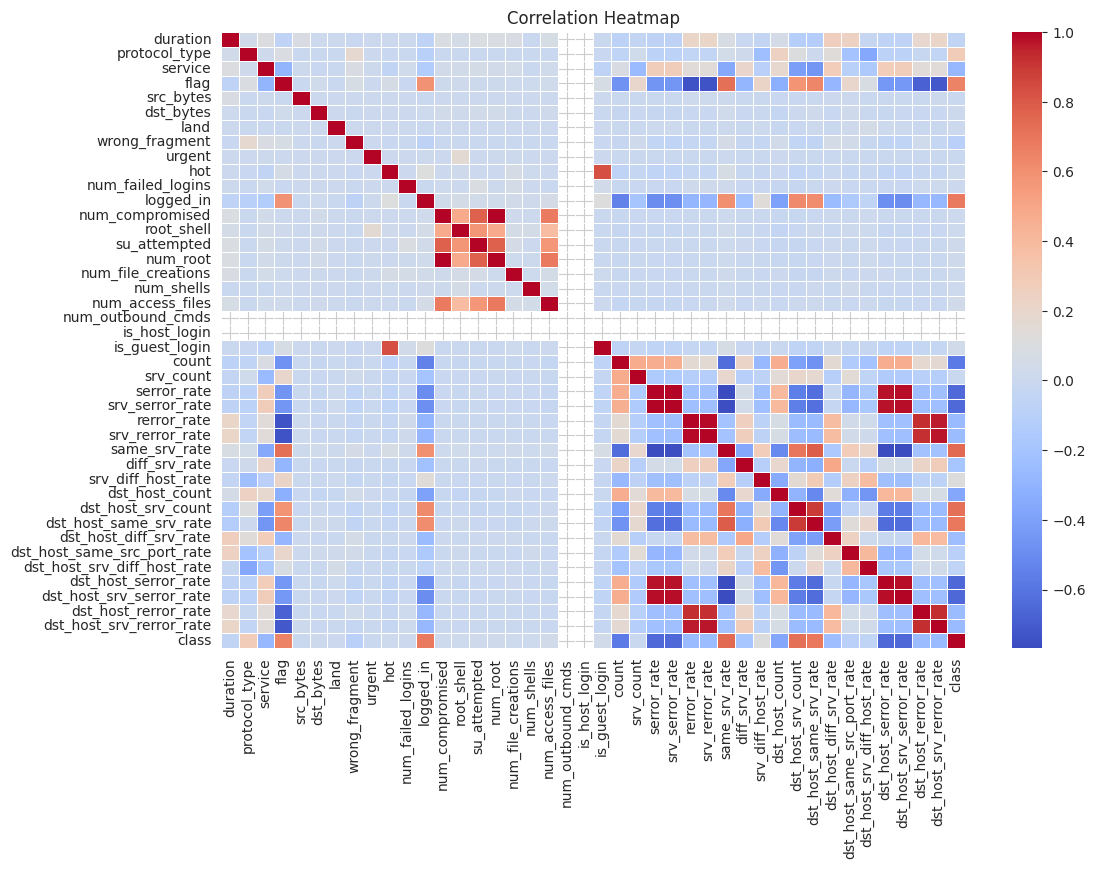

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.select_dtypes(include=['int64', 'float64']).corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# K-means Clustering

Accuracy :  0.5338599555414417


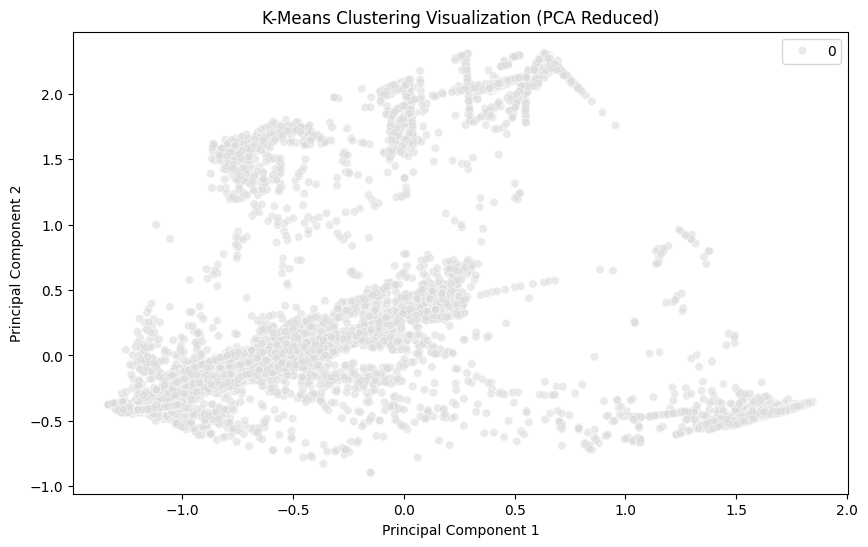

Accuracy :  0.6082089552238806


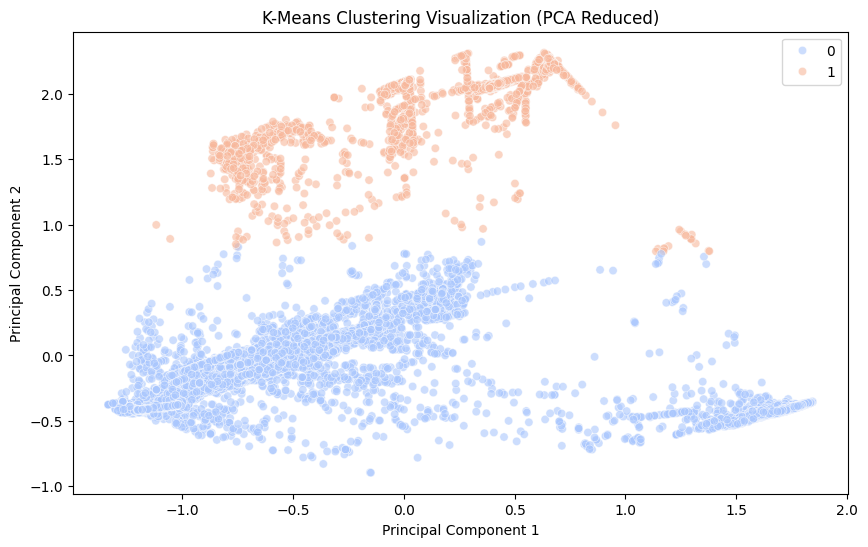

Accuracy :  0.8842886630676405


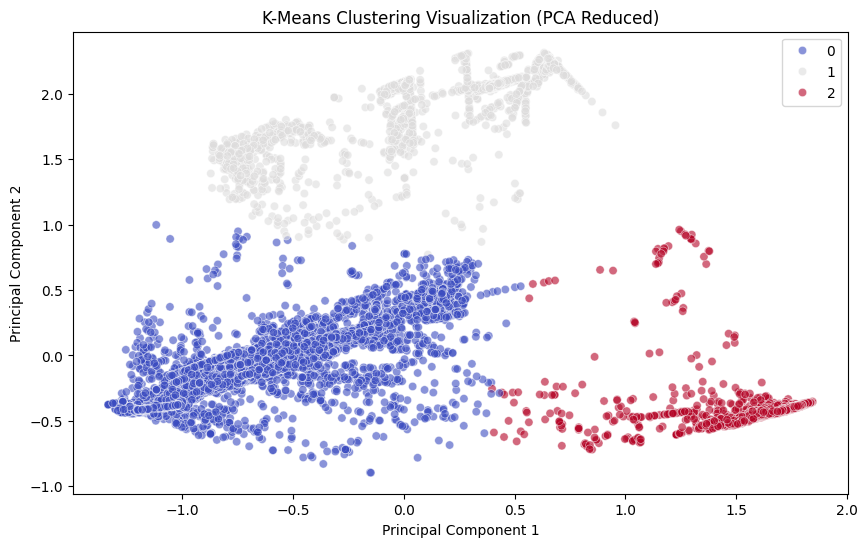

Accuracy :  0.8840107970784375


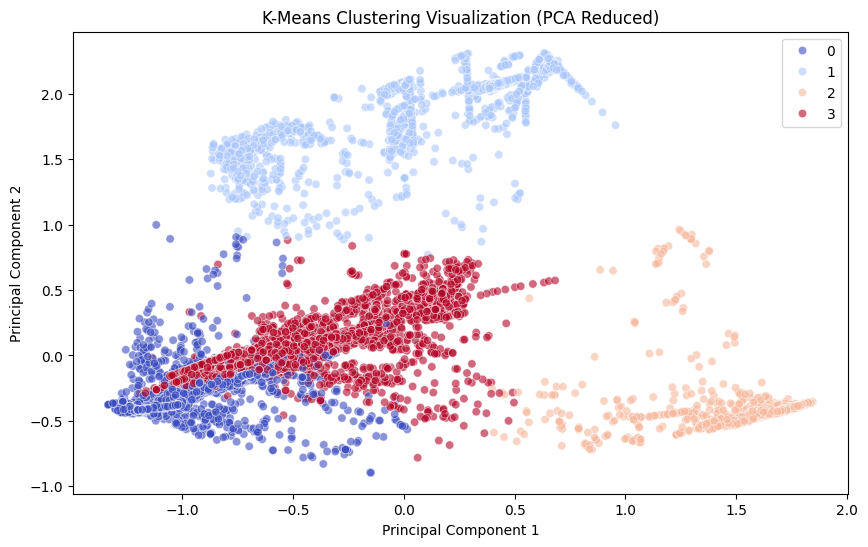

Accuracy :  0.8830978088281994


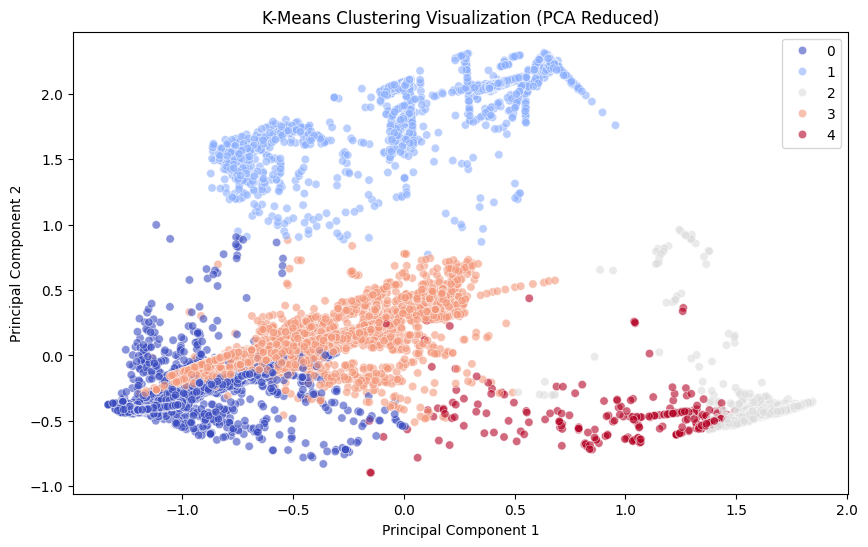

Accuracy :  0.8835741505239759


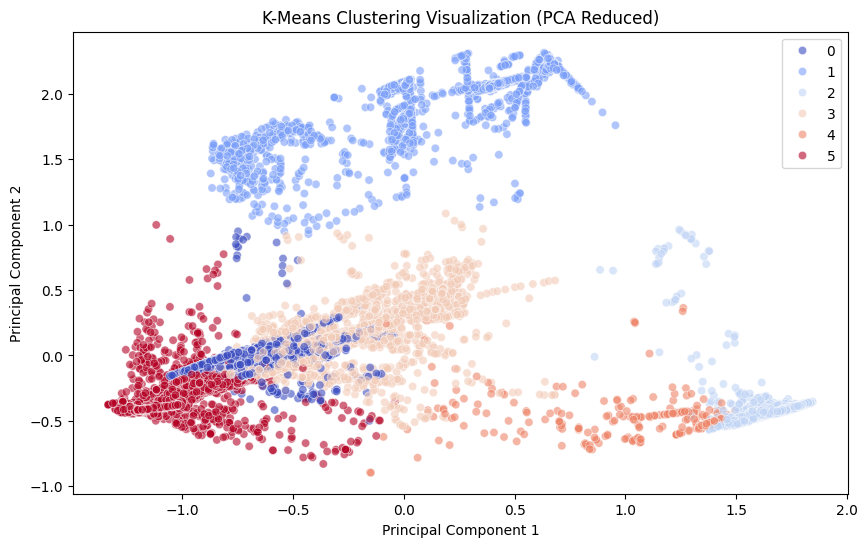

Accuracy :  0.8836932359479199


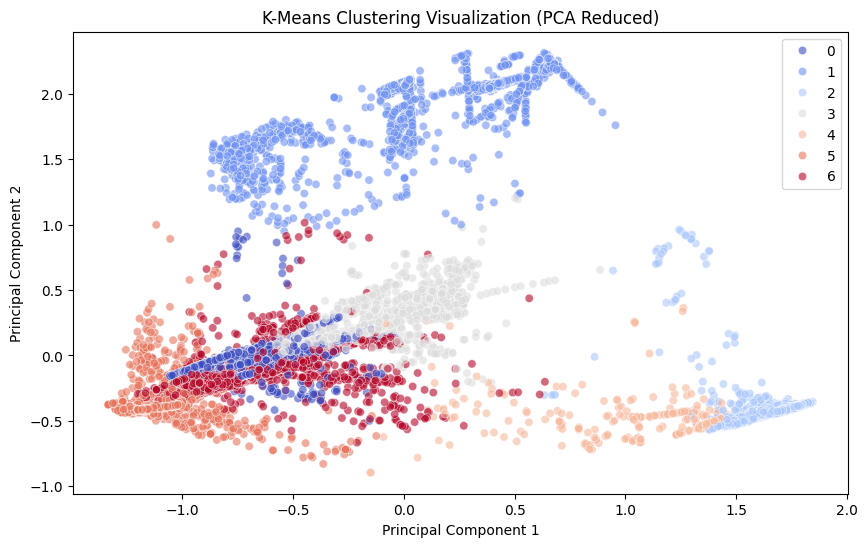

Accuracy :  0.883812321371864


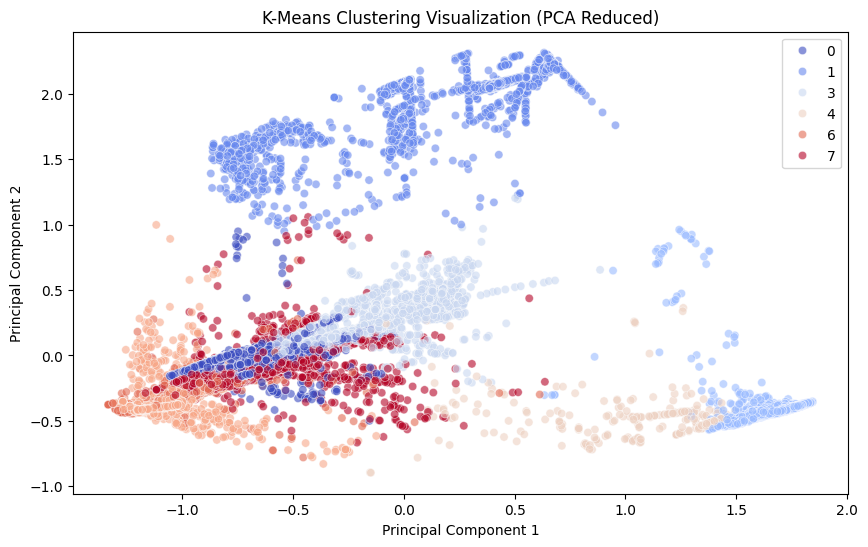

Accuracy :  0.9230708161321054


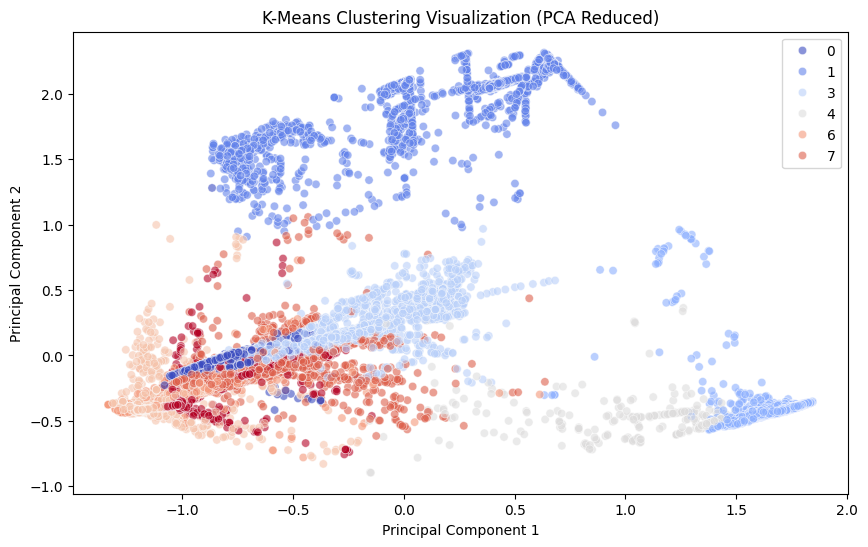

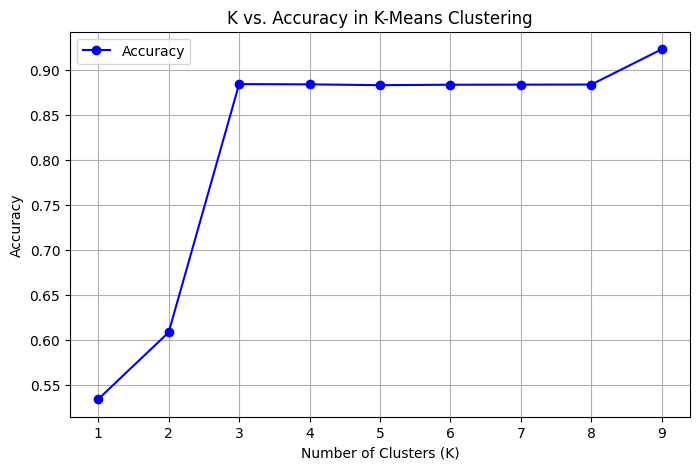

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
from sklearn.decomposition import PCA
train_data=pd.read_csv("/content/drive/MyDrive/Train_data.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Test_data.csv")
# Encode categorical features
categorical_features = ["protocol_type", "service", "flag"]
label_encoders = {col: LabelEncoder() for col in categorical_features}
for col in categorical_features:
    # Fit label encoder on training data
    label_encoders[col] = LabelEncoder()
    train_data[col] = label_encoders[col].fit_transform(train_data[col])

    # Manually extend classes_ with "unknown"
    label_encoders[col].classes_ = np.append(label_encoders[col].classes_, "unknown")

    # Replace unseen categories in test data with "unknown"
    test_data[col] = test_data[col].apply(lambda x: x if x in label_encoders[col].classes_ else "unknown")

    # Transform test data
    test_data[col] = label_encoders[col].transform(test_data[col])

# Select features for clustering (excluding 'class' in train set)
features = train_data.drop(columns=["class"])
test_features = test_data.copy()

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
test_features_scaled = scaler.transform(test_features)

# Convert labels to binary (normal=0, anomaly=1)
train_labels = (train_data["class"] != "normal").astype(int)

# Define K-Means from scratch
class KMeansCustom:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for _ in range(self.max_iters):
            # Assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Compute new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

            # Check convergence
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Apply K-Means]
accuracies=[]
k_values = list(range(1, 10))
for i in k_values:
  kmeans = KMeansCustom(k=i)
  kmeans.fit(features_scaled)
  predicted_clusters = kmeans.predict(features_scaled)

# Map clusters to normal/anomaly using majority vote
  from scipy.stats import mode

  cluster_labels = np.zeros(kmeans.k)
  for i in range(kmeans.k):
      cluster_labels[i] = mode(train_labels[kmeans.labels == i])[0]

  # Convert cluster labels to binary classification
  predicted_labels = cluster_labels[kmeans.labels]

  # Compute accuracy
  accuracy = np.mean(predicted_labels == train_labels)
  accuracies.append(accuracy)
  print("Accuracy : ", accuracy)




  # Reduce dimensions using PCA (2D)
  pca = PCA(n_components=2)
  reduced_features = pca.fit_transform(features_scaled)

  # Plot clusters
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=kmeans.labels, palette="coolwarm", alpha=0.6)
  # plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c="black", marker="X", s=200, label="Centroids")
  plt.title("K-Means Clustering Visualization (PCA Reduced)")
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.legend()
  plt.show()
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Accuracy")
plt.title("K vs. Accuracy in K-Means Clustering")
plt.legend()
plt.grid(True)
plt.show()